In [1]:
# Import Dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  We'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that 
#  we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each 
#  array as a variable.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.  The logical operator "not in" is added to
    # determine whether the found city is already in the cities list.  If it isnt it will be added in "append"
    # function line.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in out list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count = 1
        record_count = 1
        #time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
# We create the for loop with the enumerate() method and reference
# the index and the city in the list.
for i, city in enumerate(cities):

    #In the conditional statement, we check if the remainder of the
    # index divided by 50 is equal to 0 and if the index is greater
    # than or equal to 50. If the statement is true, then the 
    # set_count and the record_count are incremented by 1.
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)
    # Inside the conditional statement, we create the URL endpoint 
    # for each city, as before. However, we are removing the blank 
    # spaces in the city name and concatenating the city name with,
    # city.replace(" ","+"). This will find the corresponding 
    # weather data for the city instead of finding the weather data 
    # for the first part of the city name.
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # we add a print statement that tells us the record count and 
    # set count, and the city that is being processed.
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count, before next city.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ust-bolsheretsk
City not found. Skipping...
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | binzhou
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | sonoita
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | lafia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ijaki
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | charters towers
Processing Record 16 of Set 1 | adrar
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | san policarpo
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | albany
Processing R

Processing Record 37 of Set 4 | dingle
Processing Record 38 of Set 4 | goba
Processing Record 39 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | muborak
Processing Record 42 of Set 4 | langham
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | kirkland lake
Processing Record 45 of Set 4 | morant bay
Processing Record 46 of Set 4 | mount prospect
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | robertsport
Processing Record 49 of Set 4 | makokou
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | vilhena
Processing Record 2 of Set 5 | shush
Processing Record 3 of Set 5 | turayf
Processing Record 4 of Set 5 | podgorenskiy
Processing Record 5 of Set 5 | grevesmuhlen
Processing Record 6 of Set 5 | rota
Processing Record 7 of Set 5 | nyurba
Processing Record 8 of Set 5 | gamba
Processing Record 9 of Set 5 | meadow lake
Processing Record 10 of Set 5 

Processing Record 29 of Set 8 | kovernino
Processing Record 30 of Set 8 | hassleholm
Processing Record 31 of Set 8 | mlowo
Processing Record 32 of Set 8 | sarkand
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | tucuma
Processing Record 35 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 8 | almeirim
Processing Record 37 of Set 8 | atasu
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | potgietersrus
City not found. Skipping...
Processing Record 40 of Set 8 | lang son
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | tebingtinggi
Processing Record 43 of Set 8 | lampazos de naranjo
Processing Record 44 of Set 8 | krasnoarmeysk
Processing Record 45 of Set 8 | bloemfontein
Processing Record 46 of Set 8 | el alto
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | panjab
Processing Record 49 of Set 8 | weihai
Processing Record 50 of Set 8 | det 

Processing Record 16 of Set 12 | falealupo
City not found. Skipping...
Processing Record 17 of Set 12 | temaraia
City not found. Skipping...
Processing Record 18 of Set 12 | pombia
Processing Record 19 of Set 12 | kristiinankaupunki
Processing Record 20 of Set 12 | san isidro
Processing Record 21 of Set 12 | paamiut
Processing Record 22 of Set 12 | kuala terengganu
Processing Record 23 of Set 12 | kaeo
Processing Record 24 of Set 12 | belousovka
Processing Record 25 of Set 12 | morong
Processing Record 26 of Set 12 | heide
Processing Record 27 of Set 12 | san pedro de macoris
Processing Record 28 of Set 12 | trail
Processing Record 29 of Set 12 | manokwari
Processing Record 30 of Set 12 | xinmin
Processing Record 31 of Set 12 | kassala
Processing Record 32 of Set 12 | marsaxlokk
Processing Record 33 of Set 12 | lovozero
Processing Record 34 of Set 12 | ereymentau
Processing Record 35 of Set 12 | krasnoselkup
Processing Record 36 of Set 12 | manbij
Processing Record 37 of Set 12 | mabar

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,14.16,58,56,7.31,GL,2022-02-03 18:02:49
1,Rikitea,-23.1203,-134.9692,77.36,77,100,14.41,PF,2022-02-03 18:02:49
2,Binzhou,37.3667,118.0167,27.25,48,72,5.37,CN,2022-02-03 18:02:50
3,New Norfolk,-42.7826,147.0587,48.70,71,9,2.64,AU,2022-02-03 18:02:50
4,Sonoita,31.8500,-112.8333,47.53,15,0,5.84,MX,2022-02-03 18:02:51
5,Kaitangata,-46.2817,169.8464,48.96,94,100,3.67,NZ,2022-02-03 18:02:51
6,Lafia,8.4833,8.5167,87.49,12,8,2.06,NG,2022-02-03 18:02:51
7,Mataura,-46.1927,168.8643,52.48,96,100,1.88,NZ,2022-02-03 18:02:45
8,Jamestown,42.0970,-79.2353,31.08,55,100,12.66,US,2022-02-03 18:02:52
9,Hilo,19.7297,-155.0900,71.40,69,40,8.05,US,2022-02-03 18:02:52


In [12]:

# Reorder the columns in the order you want them to appear.    
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-02-03 18:02:49,65.6145,-37.6368,14.16,58,56,7.31
1,Rikitea,PF,2022-02-03 18:02:49,-23.1203,-134.9692,77.36,77,100,14.41
2,Binzhou,CN,2022-02-03 18:02:50,37.3667,118.0167,27.25,48,72,5.37
3,New Norfolk,AU,2022-02-03 18:02:50,-42.7826,147.0587,48.70,71,9,2.64
4,Sonoita,MX,2022-02-03 18:02:51,31.8500,-112.8333,47.53,15,0,5.84
...,...,...,...,...,...,...,...,...,...
555,Houma,US,2022-02-03 18:05:44,29.5958,-90.7195,75.20,67,74,18.63
556,Svetlyy,RU,2022-02-03 18:05:45,54.6750,20.1347,33.85,98,100,8.12
557,Warrington,GB,2022-02-03 18:05:45,53.3925,-2.5802,52.25,80,40,4.00
558,Jacareacanga,BR,2022-02-03 18:05:45,-6.2222,-57.7528,90.34,51,97,3.78


In [13]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

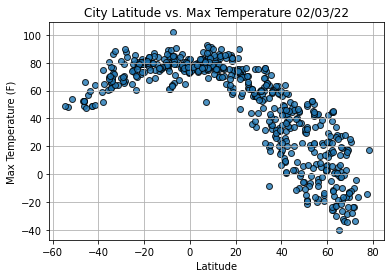

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

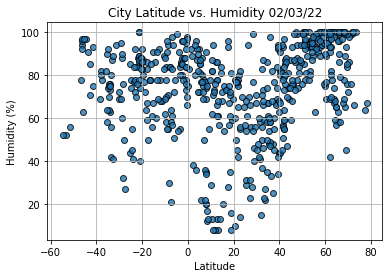

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

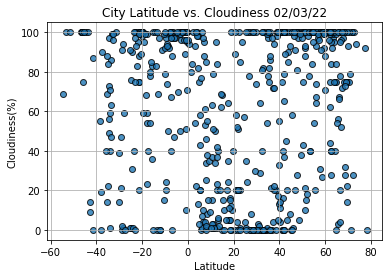

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

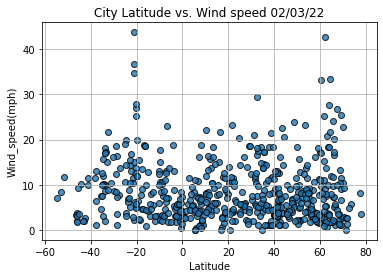

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# # CREATE LINEAR REGRESSION FUNCTION.

# # Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all 
# # four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.title(title)
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [96]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [97]:
# Example using the "loc" method by using "index" city_dat_df.
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2022-02-03 18:02:53
Lat                       69.7008
Lng                      170.3133
Max Temp                   -13.31
Humidity                       84
Cloudiness                     14
Wind Speed                   2.62
Name: 13, dtype: object

In [98]:
# Example filtering a DataFrame based on a value of a row. with equal to 0 with city_dat_df.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
555     True
556     True
557     True
558    False
559    False
Name: Lat, Length: 560, dtype: bool

In [99]:
# Example using the "loc" method to filter data latitudes >= 0 using city_dat_df.  using head()
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-02-03 18:02:49,65.6145,-37.6368,14.16,58,56,7.31
2,Binzhou,CN,2022-02-03 18:02:50,37.3667,118.0167,27.25,48,72,5.37
4,Sonoita,MX,2022-02-03 18:02:51,31.8500,-112.8333,47.53,15,0,5.84
6,Lafia,NG,2022-02-03 18:02:51,8.4833,8.5167,87.49,12,8,2.06
8,Jamestown,US,2022-02-03 18:02:52,42.0970,-79.2353,31.08,55,100,12.66


In [100]:
# Assigning DataFrame to the variable "northern_data_df" to access data to perform linear regression.
# Need to define northern_data_df we will need ot create a DataFrame. We will create one for northern 
# and southern.

# Create Nothern and SOuthern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Now we can perform linear regression on latitude and Maximum temp for each hemisphere.

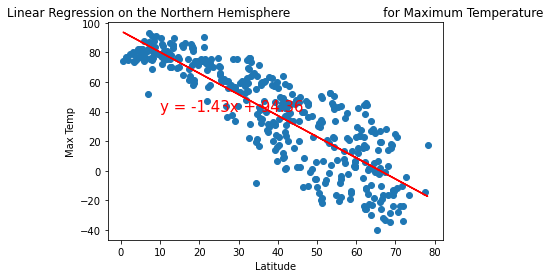

In [101]:
# We will call the plot_linear_regression function.

#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))

In [102]:
linregress(x_values, y_values)

LinregressResult(slope=-1.4258818981829746, intercept=94.3626844256892, rvalue=-0.8600246914708138, pvalue=3.8523313826373993e-115, stderr=0.04300334362269218, intercept_stderr=1.887695866606013)

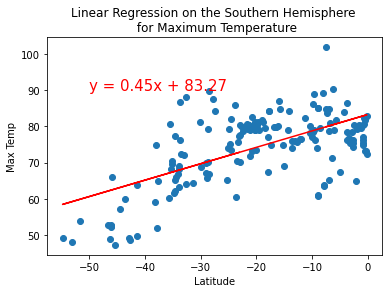

In [103]:
# We will call the plot_linear_regression function.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [104]:
linregress(x_values, y_values)

LinregressResult(slope=0.4532436489072029, intercept=83.26626173606957, rvalue=0.6171284222543374, pvalue=2.510977704697123e-19, stderr=0.04445408191456145, intercept_stderr=1.076036996709531)

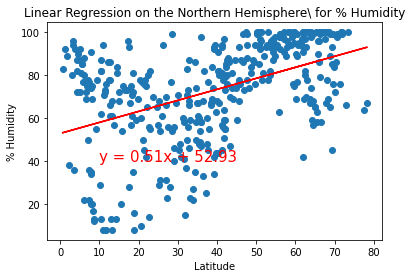

In [127]:
# We will call the plot_linear_regression function for Percent Humidity in Northern Hemisphere.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\ for % Humidity', '% Humidity',(10,40))


In [122]:
linregress(x_values, y_values)

LinregressResult(slope=0.5125825041964853, intercept=52.92567873626561, rvalue=0.4577273124707901, pvalue=1.5331166528038244e-21, stderr=0.050611414996880794, intercept_stderr=2.2216634997256137)

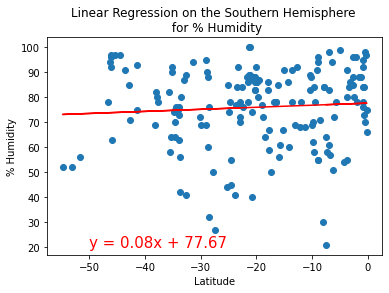

In [123]:
# We will call the plot_linear_regression function.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))


In [124]:
linregress(x_values, y_values)

LinregressResult(slope=0.08256931836441195, intercept=77.66563641796905, rvalue=0.07047788942049546, pvalue=0.3596679886356263, stderr=0.08989616609437136, intercept_stderr=2.175989164860088)

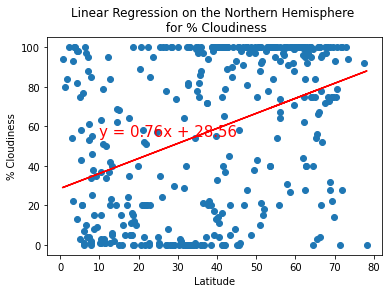

In [136]:
# We will call the plot_linear_regression function for % Cloudiness.

#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,55))

In [137]:
linregress(x_values, y_values)

LinregressResult(slope=0.7602215837848062, intercept=28.557909310696107, rvalue=0.3932537548193269, pvalue=7.743717113066625e-16, stderr=0.09035048640883935, intercept_stderr=3.9660692721067865)

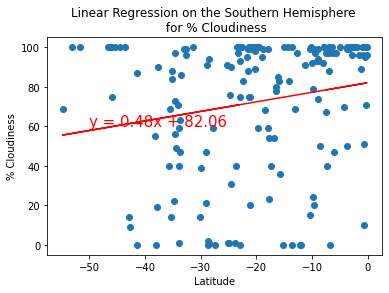

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [139]:
linregress(x_values, y_values)

LinregressResult(slope=0.48353302798330505, intercept=82.05988685384634, rvalue=0.1924320161121472, pvalue=0.011684559044668067, stderr=0.18967575540830237, intercept_stderr=4.591212356841106)

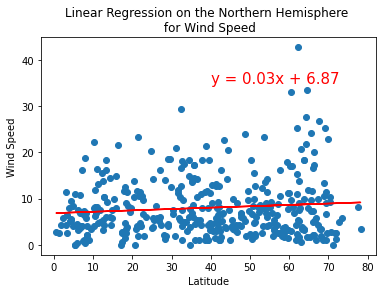

In [146]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [147]:
linregress(x_values, y_values)

LinregressResult(slope=0.029595088728647235, intercept=6.873612126023473, rvalue=0.09626637149073039, pvalue=0.05783226054015112, stderr=0.015554921683995745, intercept_stderr=0.6828064725823935)

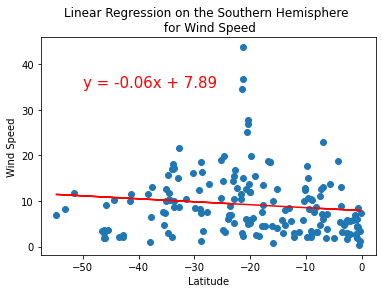

In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [149]:
linregress(x_values, y_values)


LinregressResult(slope=-0.06483611972717193, intercept=7.885248616340135, rvalue=-0.12693014985184436, pvalue=0.0980561922905438, stderr=0.0389746177992178, intercept_stderr=0.9434033699126925)